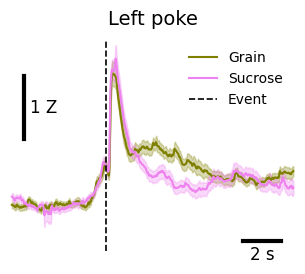

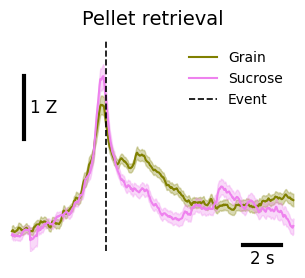

In [3]:
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Path to the cached data
cache_path = Path("processed_snips.pkl")   

# Load 
if not cache_path.exists():
    raise FileNotFoundError(f"Cache not found at {cache_path!r}; run the full extract script first.")
with open(cache_path, "rb") as f:
    snips_by_diet, time_vector, bins, fs_global = pickle.load(f)


def plot_diet_overlay(event_type: str,
                      title:      str,
                      filename:   str,  
                      show_sem:   bool = True):
    fig, ax = plt.subplots(figsize=(4, 3))

    for diet, color in zip(["Grain", "Sucrose"], ["olive", "violet"]):
        snip_list = snips_by_diet[diet][event_type]
        if not snip_list:
            continue

        all_trials = np.vstack(snip_list)
        mean_trace = np.mean(all_trials, axis=0)
        if show_sem:
            sem_trace = np.std(all_trials, ddof=1, axis=0) / np.sqrt(all_trials.shape[0])

        ax.plot(time_vector, mean_trace,
                label=diet, linewidth=1.5, color=color)
        if show_sem:
            ax.fill_between(time_vector,
                            mean_trace - sem_trace,
                            mean_trace + sem_trace,
                            alpha=0.3, color=color)

    ax.axvline(0, linestyle='--', color='black', linewidth=1.2, label='Event')
    ax.set_xlim(time_vector[0] - 0.1, time_vector[-1] + 0.1)
    ax.set_ylim(-0.8, 2.6)
    ax.set_yticks(np.arange(-0.5, 2.6, 0.5))

    box = ax.get_position()
    ax.set_position([box.x0 + 0.05, box.y0 + 0.05,
                     box.width * 0.92, box.height * 0.92])

    ax.xaxis.set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)

    x0, x1 = ax.get_xlim()
    frac = 2.0 / (x1 - x0)
    start, end = 0.95 - frac, 0.95
    y_frac = 0.03 if event_type.lower().startswith('pellet') else 0.05
    ax.plot([start, end], [y_frac, y_frac],
            transform=ax.transAxes, linewidth=3, color='black')
    ax.text((start + end)/2, y_frac - 0.025, "2 s",
            transform=ax.transAxes, ha='center', va='top', fontsize='large')

    y0, y1 = ax.get_ylim()
    h_frac = 1.0 / (y1 - y0)
    y_start = (1.0 - y0) / (y1 - y0)
    y_end   = y_start + h_frac
    x_frac  = 0.05
    ax.plot([x_frac, x_frac], [y_start, y_end],
            transform=ax.transAxes, linewidth=3, color='black')
    ax.text(x_frac + 0.02, (y_start + y_end)/2, "1 Z",
            transform=ax.transAxes, ha='left', va='center', fontsize='large')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=14, pad=10)
    ax.legend(frameon=False)

    
    plt.show()

# Run the plots
if __name__ == "__main__":
    plot_diet_overlay("poke",   "Left poke",        "unused_filename.pdf")
    plot_diet_overlay("pellet", "Pellet retrieval", "unused_filename.pdf")
